In [84]:
from keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt

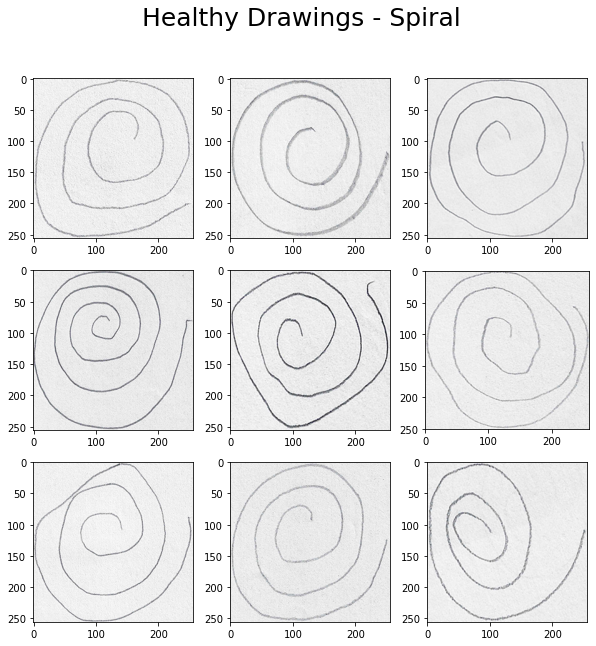

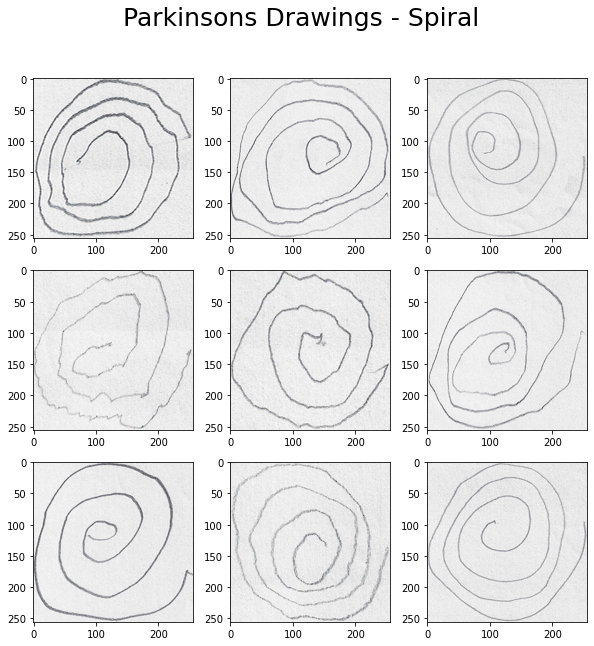

In [85]:
plt.figure(figsize= (10,10))
plt.suptitle('Healthy Drawings - Spiral', fontsize=25)
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("./spiral/training/healthy/"+
                  os.listdir("./spiral/training/healthy")[i])
    plt.imshow(img)   
plt.show()

# showing parkinson image
plt.figure(figsize= (10,10))
plt.suptitle('Parkinsons Drawings - Spiral', fontsize=25)
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("./spiral/training/parkinson/"+
                  os.listdir("./spiral/training/parkinson")[i])
    plt.imshow(img)   
plt.show()

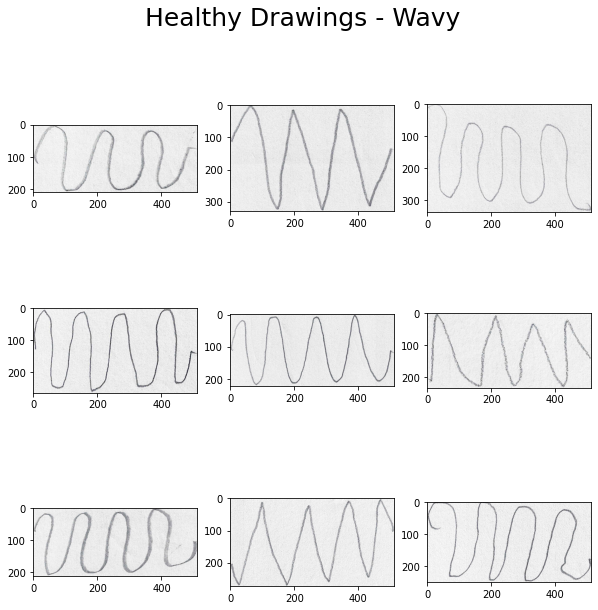

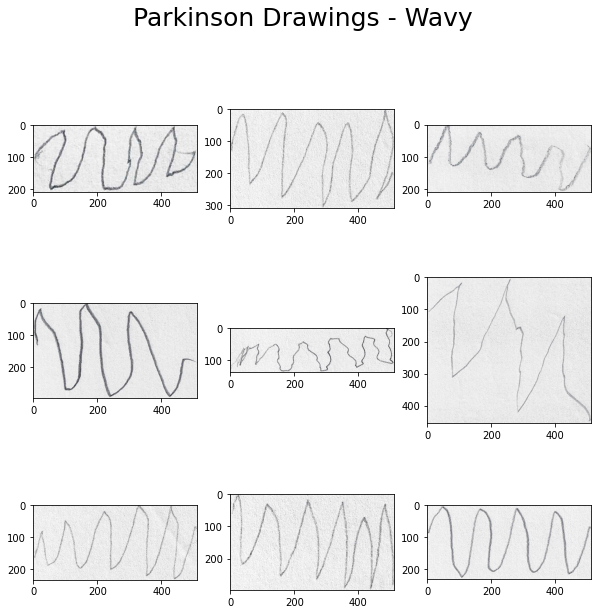

In [86]:
plt.figure(figsize= (10,10))
plt.suptitle('Healthy Drawings - Wavy', fontsize=25)
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("./wave/training/healthy/"+
                  os.listdir("./wave/training/healthy")[i])
    plt.imshow(img)   
plt.show()

plt.figure(figsize= (10,10))
plt.suptitle('Parkinson Drawings - Wavy', fontsize=25)
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("./wave/training/parkinson/"+
                  os.listdir("./wave/training/parkinson")[i])
    plt.imshow(img)   
plt.show()

In [87]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [88]:
model = keras.Sequential([
        layers.Conv2D(32, (3,3) ,input_shape=(128,128,3) , activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(32, (3,3) ,input_shape=(128,128,3) , activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(32,(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(activation ="relu", units=128),
        layers.Dense(activation="sigmoid", units=1)
])

In [89]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2, 
                                  horizontal_flip = True,
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255 )

In [90]:
spiralTrainGenerator = train_datagen.flow_from_directory('./spiral/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary' )

spiralTestGenerator= test_datagen.flow_from_directory('./spiral/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')
waveTrainGenerator = train_datagen.flow_from_directory('./wave/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

waveTestGenerator = test_datagen.flow_from_directory('./wave/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [91]:
from tensorflow.keras.optimizers import Adam
model.compile(loss="binary_crossentropy",  optimizer = Adam(lr=0.001), metrics=['accuracy'])
history = model.fit_generator(
        spiralTrainGenerator,
        steps_per_epoch=spiralTrainGenerator.n//spiralTrainGenerator.batch_size,
        epochs=25,
        validation_data=spiralTestGenerator,
        validation_steps=spiralTestGenerator.n//spiralTestGenerator.batch_size,
        )

Epoch 1/25
2/2 [==============================] - 1s 235ms/step - loss: 0.7523 - accuracy: 0.5781
Epoch 2/25
2/2 [==============================] - 0s 207ms/step - loss: 0.7187 - accuracy: 0.4844
Epoch 3/25
2/2 [==============================] - 0s 191ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 4/25
2/2 [==============================] - 0s 52ms/step - loss: 0.6892 - accuracy: 0.5750
Epoch 5/25
2/2 [==============================] - 0s 186ms/step - loss: 0.7003 - accuracy: 0.5000
Epoch 6/25
2/2 [==============================] - 0s 58ms/step - loss: 0.7153 - accuracy: 0.5250
Epoch 7/25
2/2 [==============================] - 0s 247ms/step - loss: 0.6967 - accuracy: 0.5750
Epoch 8/25
2/2 [==============================] - 0s 265ms/step - loss: 0.6921 - accuracy: 0.5250
Epoch 9/25
2/2 [==============================] - 0s 59ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 10/25
2/2 [==============================] - 0s 51ms/step - loss: 0.6879 - accuracy: 0.6000
Epoch 11/25
2/2 [======

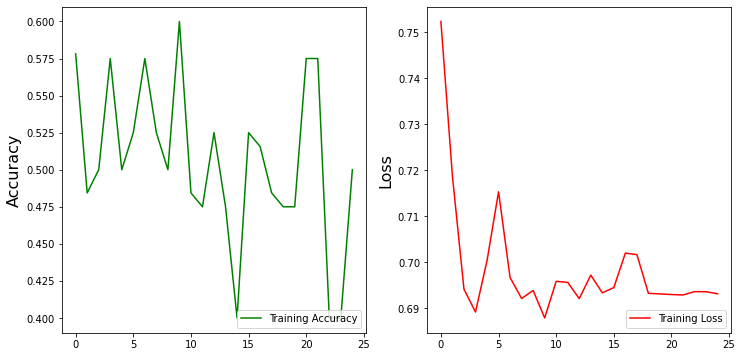

In [92]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'green')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color = 'red')
plt.legend(loc='lower right')
plt.show()